In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
# Importing the dataset
dataset = pd.read_csv('Dataset.csv')

X_ = dataset.iloc[:, dataset.columns != 'label']
y = dataset.iloc[:, dataset.columns == 'label']

In [3]:
X_.describe()

,SSIP,Stdevpack,Stdevbyte,NbFlow,NbIntFlow
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,26.869750,0.499355,208.304122,33.228000,0.757575
std,18.847429,0.303311,127.562454,14.542606,0.242470
min,10.000000,0.000000,0.000000,20.000000,0.500000
25%,12.000000,0.450748,101.220672,25.000000,0.516129
50%,26.500000,0.450748,259.841084,33.000000,0.758065
75%,41.000000,0.648886,328.038905,41.000000,1.000000
max,801.000000,15.304230,2581.712260,801.000000,1.000000


In [6]:
from sklearn import preprocessing

X = X_.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_Scaled = pd.DataFrame(x_scaled)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-1,2,1), "penalty":["l1","l2"]}# l1 lasso l2 ridge
LR=LogisticRegression()
LR_C=GridSearchCV(LR,grid,cv=2)
LR_C.fit(X_train,y_train.values.ravel())
c_value = LR_C.best_params_['C']
penalty_value = LR_C.best_params_['penalty']

print ("tuned hpyerparameters :(best parameters) ",LR_C.best_params_)
print ("accuracy :",LR_C.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 1.0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score 
lr = LogisticRegression(C = c_value, penalty = penalty_value)
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)

print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Accuracy" ,accuracy_score(y_test,y_pred))

Recall:  1.0
Accuracy 1.0


In [32]:
from sklearn.externals import joblib
filename = 'LR.sav'
joblib.dump(lr, filename)

['LR.sav']

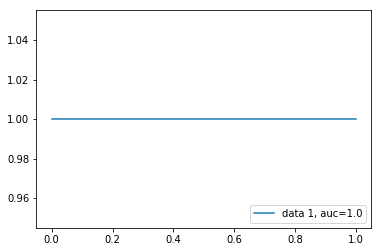

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
